### **Necessary Libraries**

In [1]:
# Data Handling

import pandas as pd
import numpy as np

# Visualization

import matplotlib.pyplot as plt
import seaborn as sns

#Display settings

pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')


### **Exploring the Data** ###

In [2]:
# Load the dataset (CSV file)

df = pd.read_csv("F:\Data Solution - 360\Module 5 Python\Assignments\Assignment_Project\ecommerce_customer_behavior_dataset.csv")

In [3]:
# Data Shape
print("ROWS:", df.shape[0], "COLUMNS:", df.shape[1])

ROWS: 10000 COLUMNS: 16


In [4]:
df.head()

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  10000 non-null  int64  
 1   Age                          10000 non-null  int64  
 2   Gender                       10000 non-null  object 
 3   Location                     10000 non-null  object 
 4   Product Category             10000 non-null  object 
 5   Purchase Amount ($)          10000 non-null  float64
 6   Time Spent on Website (min)  10000 non-null  int64  
 7   Device Type                  10000 non-null  object 
 8   Payment Method               10000 non-null  object 
 9   Discount Availed             10000 non-null  bool   
 10  Number of Items Purchased    10000 non-null  int64  
 11  Return Customer              10000 non-null  bool   
 12  Review Score (1-5)           10000 non-null  int64  
 13  Delivery Time (da

In [6]:
# Missing Values Analysis
print(df.isnull().sum())

Customer ID                    0
Age                            0
Gender                         0
Location                       0
Product Category               0
Purchase Amount ($)            0
Time Spent on Website (min)    0
Device Type                    0
Payment Method                 0
Discount Availed               0
Number of Items Purchased      0
Return Customer                0
Review Score (1-5)             0
Delivery Time (days)           0
Subscription Status            0
Customer Satisfaction          0
dtype: int64


In [7]:
# Duplicate Records Check
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate records: {num_duplicates}")

Number of duplicate records: 0


In [8]:
df.describe()

,Customer ID,Age,Purchase Amount ($),Time Spent on Website (min),Number of Items Purchased,Review Score (1-5),Delivery Time (days)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,43.789900,503.892494,29.918400,4.998500,2.995100,7.013000
std,2886.89568,15.005521,286.238084,17.002107,2.574988,1.404163,3.721561
min,1.00000,18.000000,5.190000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,31.000000,254.937500,15.000000,3.000000,2.000000,4.000000
50%,5000.50000,44.000000,506.195000,30.000000,5.000000,3.000000,7.000000
75%,7500.25000,57.000000,749.135000,45.000000,7.000000,4.000000,10.000000
max,10000.00000,69.000000,999.980000,59.000000,9.000000,5.000000,13.000000


**Since The Data Seems Clean Let's Deep Dive Into The Analysis**

### **Level 1: Basic Insights**

### Q1: Find Mean, Median, and Mode (Age)

In [9]:
print("Mean Age:", df['Age'].mean())
print("Median Age:", df['Age'].median())
print("Mode Age:", df['Age'].mode()[0])

Mean Age: 43.7899
Median Age: 44.0
Mode Age: 51


### Q2: Find variance, standard deviation, and z-score (Purchase Amount)

In [10]:
variance_purchase = df['Purchase Amount ($)'].var()
mean_purchase = df['Purchase Amount ($)'].mean()
std_purchase = df['Purchase Amount ($)'].std()

df['Z_Score'] = (df['Purchase Amount ($)'] - mean_purchase) / std_purchase if std_purchase else 0

print("Variance:", f'{variance_purchase:.2f}')
print("Standard Deviation:", f'{std_purchase:.2f}')
df[['Purchase Amount ($)', 'Z_Score']].head()

Variance: 81932.24
Standard Deviation: 286.24


,Purchase Amount ($),Z_Score
0,202.54,-1.052804
1,655.94,0.531192
2,963.65,1.606207
3,485.59,-0.063942
4,143.27,-1.259869


### Q3: What are the top three product categories based on the number of purchases?

C:\Users\Rumman\AppData\Local\Temp\ipykernel_14052\1398515995.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Top_categories.index, y=Top_categories.values, palette='magma')


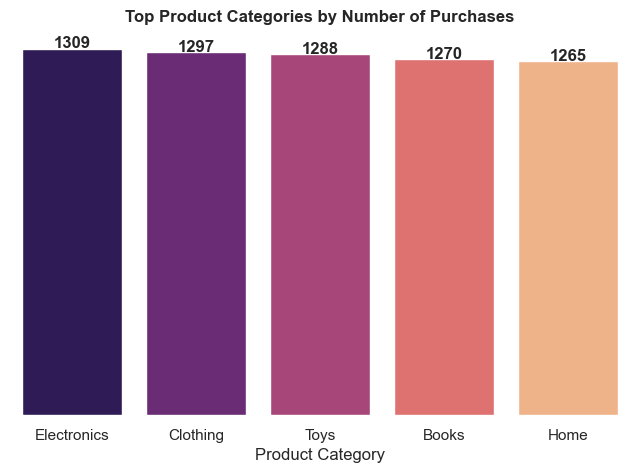

In [11]:
Top_categories = df['Product Category'].value_counts().head(5)

sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
sns.barplot(x=Top_categories.index, y=Top_categories.values, palette='magma')

for i, v in enumerate(Top_categories.values):
    plt.text(i, v + 1, str(v), ha='center', fontweight='bold')

plt.yticks([])

plt.title('Top Product Categories by Number of Purchases', fontweight='bold')
plt.xlabel('Product Category', fontsize=12)


sns.despine(left=True, bottom=True)
plt.show()

### Q4: How many customers are classified as return customers?

In [12]:
retun_cust = df['Return Customer'].sum()

print(f"Number of Return Customers: {retun_cust}")

Number of Return Customers: 4996


### Q5: What is the average review score given by customers?

In [13]:
Avg_review_score = df['Review Score (1-5)'].mean()
print("Average Review Score:", Avg_review_score)

Average Review Score: 2.9951


### Q6: How does the average delivery time vary between subscription statuses (Free, Premium)?

In [14]:
Avg_delivery_time = df.groupby('Subscription Status')['Delivery Time (days)'].mean().sort_values()

print("Average Delivery Time by Subscription Status:")
for status, time in Avg_delivery_time.items():
    print(f"{status}: {time:.0f} days")




Average Delivery Time by Subscription Status:
Free: 7 days
Trial: 7 days
Premium: 7 days


### Q7: How many customers are subscribed to the service?

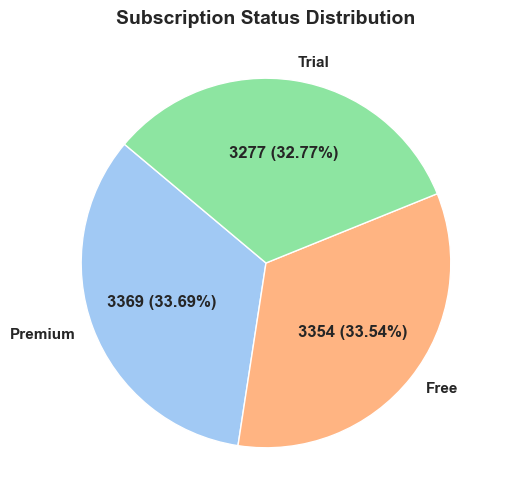

In [15]:
S_C = df['Subscription Status'].value_counts()

# print("Subscription Status Counts:")
# for status, count in S_C.items():
#     print(f"{status}: {count}")

def absolute_count(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{absolute} ({pct:.2f}%)"

plt.figure(figsize=(6,6))
colors = sns.color_palette('pastel')[0:5]
plt.pie(S_C.values, labels=S_C.index, autopct=lambda pct: absolute_count(pct, S_C.values),
        colors=colors, startangle=140, textprops={'fontweight': 'bold'})

plt.title('Subscription Status Distribution', fontweight='bold', fontsize=14)
plt.show()


### Q8: What percentage of customers used devices to make purchases? (Mobile, Desktop, Tablet)

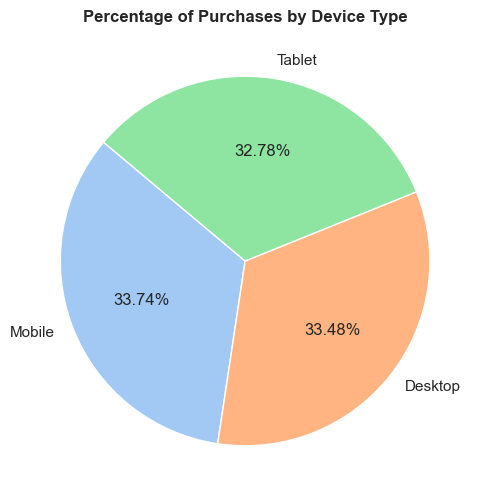

In [16]:
device_counts = df['Device Type'].value_counts(normalize=True) * 100

# print("Device Type Distribution (%):")
# for device, percent in device_counts.items():
#     print(f"{device}: {percent:.2f}%")

plt.figure(figsize=(6,6))
device_counts.plot.pie(autopct='%1.2f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Percentage of Purchases by Device Type', fontweight='bold')
plt.ylabel('')
plt.show()

### Q9: What is the average purchase amount for customers who availed discounts compared to those who didnʼt?

Average Purchase Amount by Discount Availed:
False: $502.51
True: $505.26


C:\Users\Rumman\AppData\Local\Temp\ipykernel_14052\1263592216.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Discount Availed', y='Purchase Amount ($)', data=df, palette='Set3')


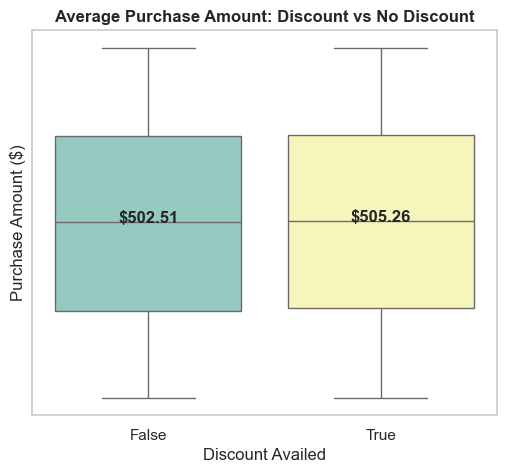

In [17]:
Avg_Purchase_Amount = df.groupby('Discount Availed')['Purchase Amount ($)'].mean()
print("Average Purchase Amount by Discount Availed:")
for discount, amount in Avg_Purchase_Amount.items():
    print(f"{discount}: ${amount:.2f}")

sns.set_style('whitegrid')
plt.figure(figsize=(6,5))
sns.boxplot(x='Discount Availed', y='Purchase Amount ($)', data=df, palette='Set3')

for i, amount in enumerate(Avg_Purchase_Amount):
    plt.text(i, amount + 1, f"${amount:.2f}", ha='center', fontweight='bold')

plt.title('Average Purchase Amount: Discount vs No Discount', fontweight='bold')
plt.yticks([])
plt.show()

### Q10: What is the most common payment method used by customers?

C:\Users\Rumman\AppData\Local\Temp\ipykernel_14052\2214852523.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pay_counts.index, y=pay_counts.values, palette='magma')


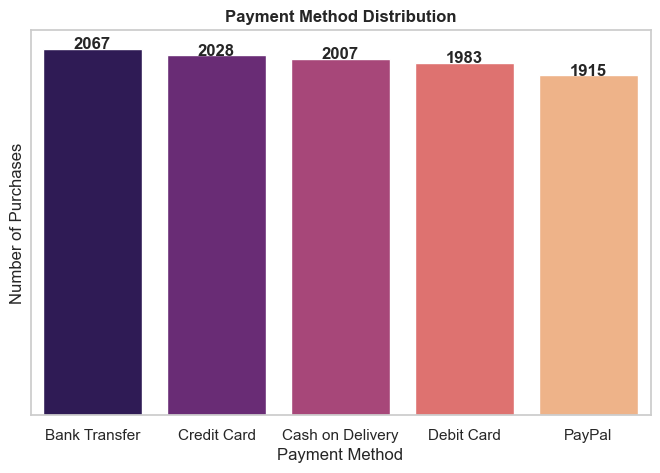

In [18]:
# Com_pay_method = df['Payment Method'].mode()[0]
# print("Most Common Payment Method:", Com_pay_method)

pay_counts = df['Payment Method'].value_counts()

sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
sns.barplot(x=pay_counts.index, y=pay_counts.values, palette='magma')

for i, v in enumerate(pay_counts.values):
    plt.text(i, v + 1, str(v), ha='center', fontweight='bold')

plt.title('Payment Method Distribution', fontweight='bold')
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.yticks([])
plt.show()

### **Level 2: Intermediate Insights**

### Q1: What are the average review scores of users of the most common payment method?

Most Common Payment Method: Bank Transfer
Average Review Score for Bank Transfer: 2.99


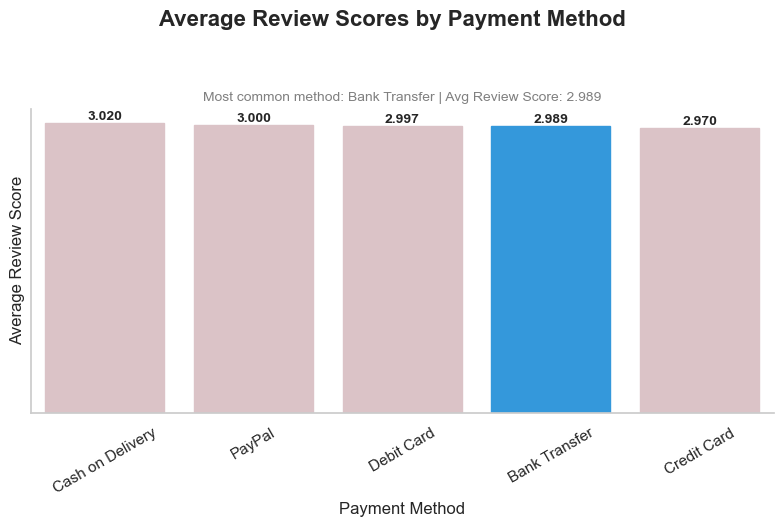

In [19]:
# Most Common Payment Method:
common_payment = df['Payment Method'].mode()[0]

# Average review score for that payment method:
Avg_review_score = df.groupby('Payment Method')['Review Score (1-5)'].mean().sort_values(ascending=False)

print("Most Common Payment Method:", common_payment)
print(f"Average Review Score for {common_payment}: {Avg_review_score[common_payment]:.2f}")

# Visualization
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
ax = sns.barplot(x=Avg_review_score.index, y=Avg_review_score.values)

for bar, method in zip(ax.patches, Avg_review_score.index):
    if method == common_payment:
        bar.set_color('#3498db')
    else:
        bar.set_color('#dbc3c7')

# Main Title
plt.suptitle(
    f'Average Review Scores by Payment Method',
    fontweight='bold',
    fontsize=16,
    y=1.05
)

# Subtitle
plt.title(
    f'Most common method: {common_payment} | Avg Review Score: {Avg_review_score[common_payment]:.3f}',
    fontsize=10,
    color='gray'
)

# Add value labels on bars (very good for PPT)
for bar in ax.patches:
    ax.annotate(
        f'{bar.get_height():.3f}',
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Labels and Layout
plt.ylabel('Average Review Score')
plt.xlabel('Payment Method')
# plt.ylim(0, 5)
plt.xticks(rotation=30)
plt.yticks([])
plt.tight_layout()
sns.despine()
plt.show()

### Q2: What is the correlation between time spent on the website and purchase amount? Do customers who spend more time on the website purchase more items?

Correlation between Time Spent on Website and Purchase Amount: 0.01


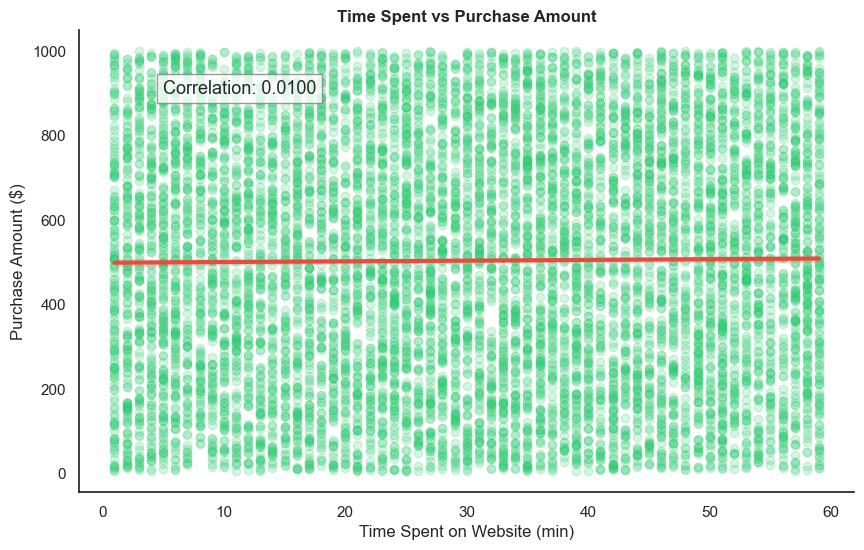

In [20]:
corr = df['Time Spent on Website (min)'].corr(df['Purchase Amount ($)'])
print(f"Correlation between Time Spent on Website and Purchase Amount: {corr:.2f}")

#Scatter Plot with Regression Line
sns.set_style('white')
plt.figure(figsize=(10,6))
sns.regplot(x='Time Spent on Website (min)', y='Purchase Amount ($)', data=df, 
            scatter_kws={'alpha':0.2, 'color':'#2ecc71'}, line_kws={'color':'#e74c3c', 'lw':3})
plt.text(5, 900, f'Correlation: {corr:.4f}', 
         fontsize=13, bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
plt.title('Time Spent vs Purchase Amount', fontweight='bold')
sns.despine()
plt.show()

### Q3: What percentage of customers are satisfied (rating of 4 or 5) and are also return customers?

In [21]:
satisfied_returns = df[(df['Review Score (1-5)'] >= 4) & (df['Return Customer'] == True)]
percentage = (len(satisfied_returns) / len(df)) * 100
print(f"Percentage of Satisfied Return Customers: {percentage:.2f}%")

# # Total Percentage of Satisfied Customers
# satisfied_customers = df[df['Review Score (1-5)'] >= 4]
# percentage_satisfied = (len(satisfied_customers) / len(df)) * 100
# print(f"Percentage of Satisfied Customers: {percentage_satisfied:.2f}%")

# # Percentage of Satisfied Return Customers
# satisfied_returns = satisfied_customers[satisfied_customers['Return Customer'] == True]
# percentage_satisfied_returns = (len(satisfied_returns) / len(df)) * 100
# print(f"Percentage of Satisfied Return Customers: {percentage_satisfied_returns:.2f}%")


Percentage of Satisfied Return Customers: 20.08%


### Q4: What is the relationship between the number of items purchased and customer satisfaction?

C:\Users\Rumman\AppData\Local\Temp\ipykernel_14052\3213506818.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Customer Satisfaction', y='Number of Items Purchased', data=df, palette='Set2')


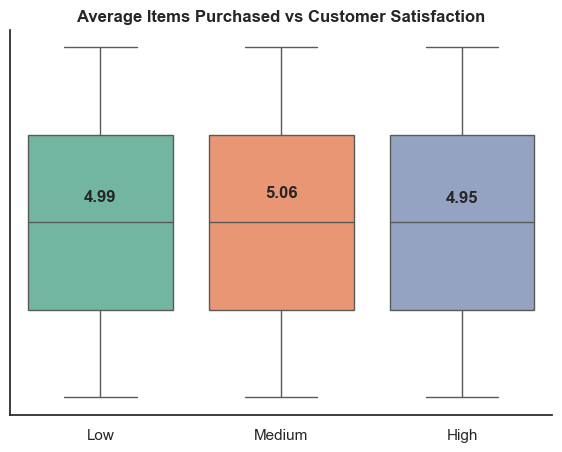

In [22]:
sns.set_style('white')
plt.figure(figsize=(7,5))
sns.boxplot(x='Customer Satisfaction', y='Number of Items Purchased', data=df, palette='Set2')
for i, category in enumerate(df['Customer Satisfaction'].unique()):
    mean_items = df[df['Customer Satisfaction'] == category]['Number of Items Purchased'].mean()
    plt.text(i, mean_items + 0.5, f"{mean_items:.2f}", ha='center', fontweight='bold')

plt.title("Average Items Purchased vs Customer Satisfaction", fontweight='bold')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
sns.despine()
plt.show()

### Q5: Which location has the 2nd highest average purchase amount?

C:\Users\Rumman\AppData\Local\Temp\ipykernel_14052\791568234.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=loc_avg_purchase.index, y=loc_avg_purchase.values, palette=colors)


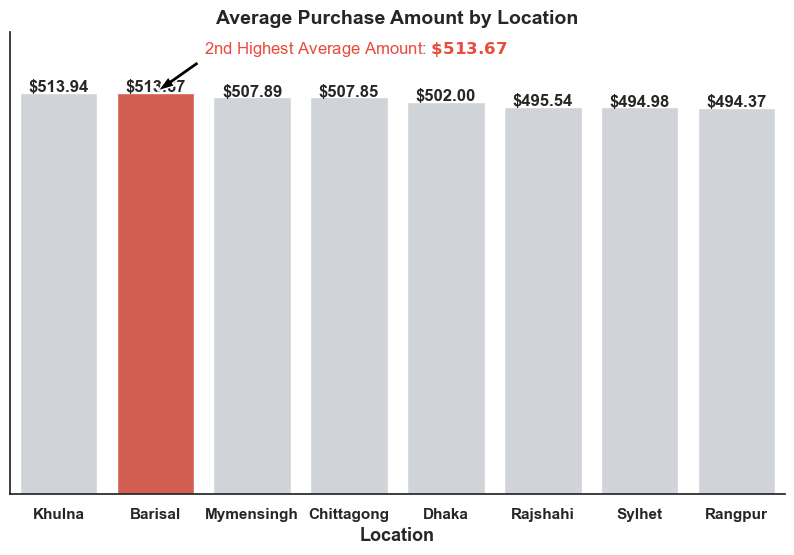

In [23]:
loc_avg_purchase = df.groupby('Location')['Purchase Amount ($)'].mean().sort_values(ascending=False)

second_highest_loc = loc_avg_purchase.index[1]
second_highest_val = loc_avg_purchase.values[1]
# print("Location with Second Highest Average Purchase Amount:", second_highest_loc)

colors = ['#ced4da' if loc != second_highest_loc else '#e74c3c' for loc in loc_avg_purchase.index]
sns.set_style('white')
plt.figure(figsize=(10,6))
ax = sns.barplot(x=loc_avg_purchase.index, y=loc_avg_purchase.values, palette=colors)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 1, f"${i.get_height():.2f}", 
            ha='center', fontweight='bold')

plt.annotate(f'2nd Highest Average Amount: $\mathbf{{\\${second_highest_val:.2f}}}$',
             xy=(1, second_highest_val), 
             xytext=(1.5, second_highest_val + 50),
             arrowprops=dict(facecolor='black', shrink=0.05, width=3, headwidth=8),
             fontsize=12, color ='#e74c3c')

plt.title('Average Purchase Amount by Location', fontsize=14, fontweight='bold')
plt.xlabel('Location', fontsize=13, fontweight='bold')
plt.xticks(fontweight='bold')
plt.ylim(0, loc_avg_purchase.values.max() *1.15)
plt.ylabel('') 
plt.yticks([])
sns.despine()
plt.show()

### **Level 3: Critical Thinking Insights**

### Q1: What factors contribute most to a customer being classified as a return customer?

Average Numeric Factors (Return vs New):
                 Review Score (1-5)  Number of Items Purchased  \
Return Customer                                                  
False                      2.982814                   4.996403   
True                       3.007406                   5.000600   

                 Purchase Amount ($)  Time Spent on Website (min)  
Return Customer                                                    
False                     503.342292                    30.025180  
True                      504.443577                    29.811449  

Discount Usage Rate (%):
Return Customer
False    48.920863
True     51.421137
Name: Discount Availed, dtype: float64

Subscription Status Distribution (%):
Subscription Status       Free    Premium      Trial
Return Customer                                     
False                33.613110  34.052758  32.334133
True                 33.466773  33.326661  33.206565


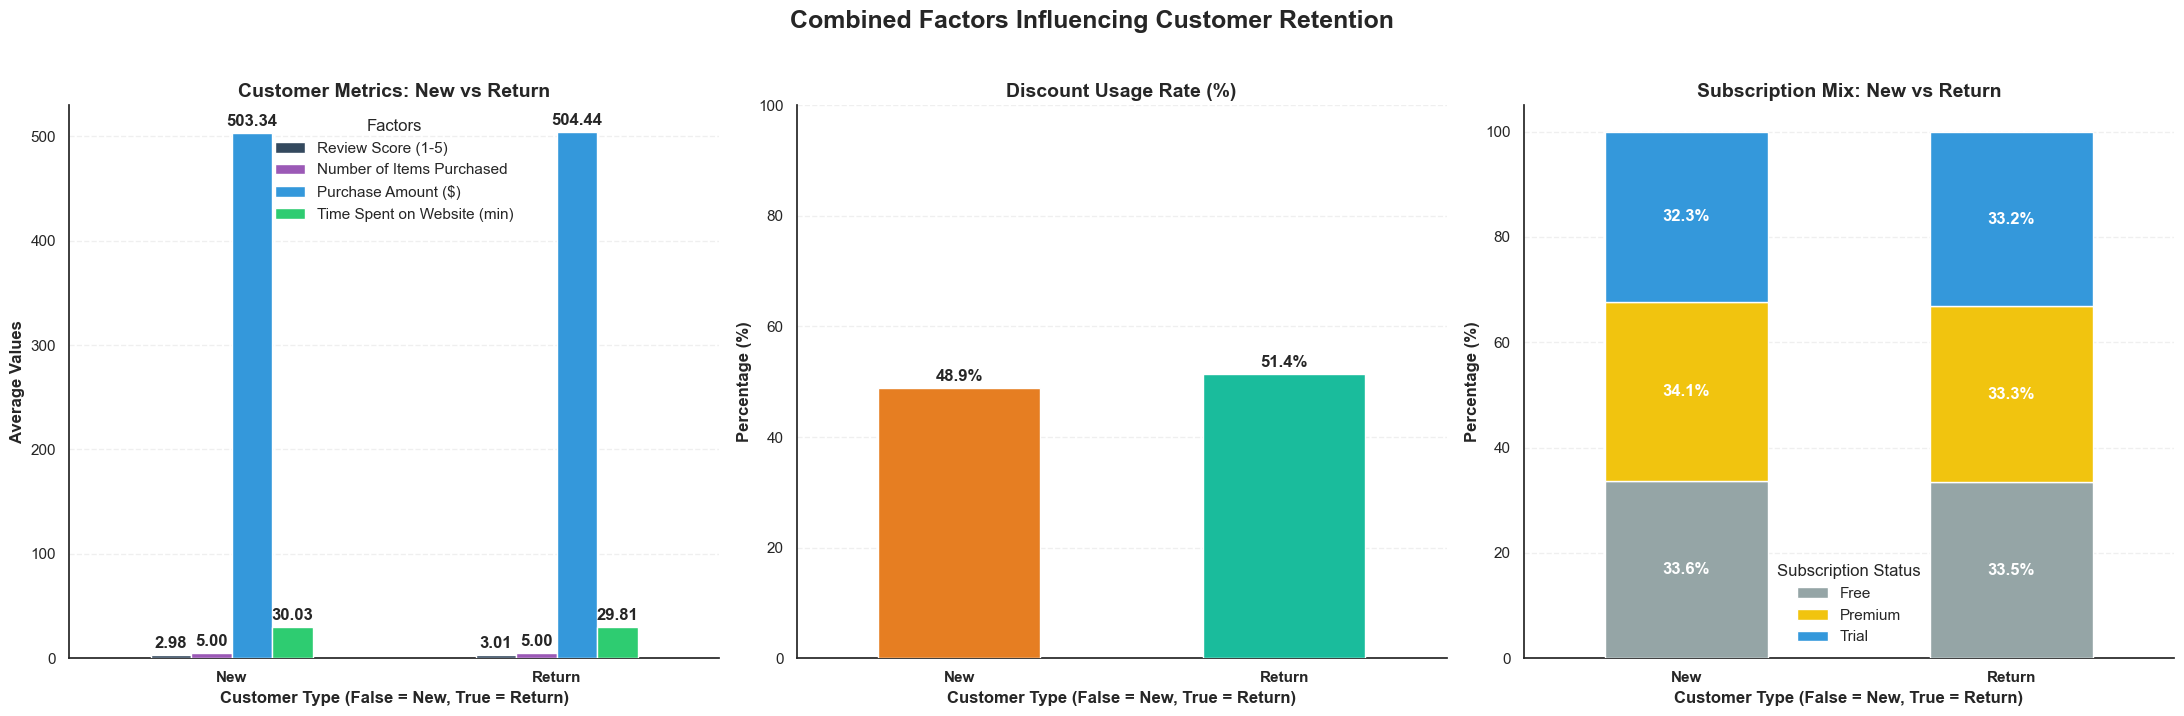

In [24]:
# Data Preparation
factors = [
    'Review Score (1-5)',
    'Number of Items Purchased',
    'Purchase Amount ($)',
    'Time Spent on Website (min)'
]

return_numeric = df.groupby('Return Customer')[factors].mean()

print("Average Numeric Factors (Return vs New):")
print(return_numeric)

# Loyalty Metrics (Percentage)

# Discount Usage Rate
discount_rate = (
    df.groupby('Return Customer')['Discount Availed'].mean() * 100
)

# Subscription Status
subscription_dist = pd.crosstab(
    df['Return Customer'],
    df['Subscription Status'],
    normalize='index'
) * 100

print("\nDiscount Usage Rate (%):")
print(discount_rate)

print("\nSubscription Status Distribution (%):")
print(subscription_dist)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(22,7))
sns.set_style('white')

# Left Plot - numerical factors
return_numeric.plot(
    kind='bar',
    ax=axes[0],
    color=['#34495e', '#9b59b6', '#3498db', '#2ecc71'],
    zorder=3
)
axes[0].set_title('Customer Metrics: New vs Return', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Customer Type (False = New, True = Return)', fontweight='bold')
axes[0].set_ylabel('Average Values', fontweight='bold')
axes[0].set_xticklabels(['New', 'Return'], rotation=0, fontweight='bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.3)
#axes[0].legend(title='Factors', frameon=False)
axes[0].legend(title='Factors', frameon=False, loc='upper center')

# Annotate values
for p in axes[0].patches:
    axes[0].annotate(
        f"{p.get_height():.2f}", 
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center', va='center',
        xytext=(0, 8), textcoords='offset points',
        fontweight='bold'
    )

# Middle Plot - Discount Usage Rate
discount_rate.plot(
    kind='bar',
    ax=axes[1],
    color=['#e67e22', '#1abc9c'],
    zorder=3
)
axes[1].set_title('Discount Usage Rate (%)', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Customer Type (False = New, True = Return)', fontweight='bold')
axes[1].set_ylabel('Percentage (%)', fontweight='bold')
axes[1].set_xticklabels(['New', 'Return'], rotation=0, fontweight='bold')
axes[1].set_ylim(0, 100)
axes[1].grid(axis='y', linestyle='--', alpha=0.3)

# Annotate values
for p in axes[1].patches:
    axes[1].annotate(
        f"{p.get_height():.1f}%", 
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center', va='center',
        xytext=(0, 8), textcoords='offset points',
        fontweight='bold'
    )

# Right Plot - Subscription Mix
subscription_dist.plot(
    kind='bar',
    stacked=True,
    ax=axes[2],
    color=['#95a5a6', '#f1c40f', '#3498db'],
    zorder=3
)
axes[2].set_title('Subscription Mix: New vs Return', fontweight='bold', fontsize=14)
axes[2].set_xlabel('Customer Type (False = New, True = Return)', fontweight='bold')
axes[2].set_ylabel('Percentage (%)', fontweight='bold')
axes[2].set_xticklabels(['New', 'Return'], rotation=0, fontweight='bold')
axes[2].legend(title='Subscription Status', frameon=False)
axes[2].grid(axis='y', linestyle='--', alpha=0.3)

# Annotate values
for p in axes[2].patches:
    height = p.get_height()
    if height > 0:
        axes[2].annotate(
            f"{height:.1f}%", 
            (p.get_x() + p.get_width() / 2, p.get_y() + height / 2), 
            ha='center', va='center',
            fontweight='bold', color='white'
        )

# Overall Title
plt.suptitle('Combined Factors Influencing Customer Retention',
    fontsize=18, fontweight='bold', y=1.02
)

sns.despine()
plt.tight_layout()
plt.show()

### Q2: How do payment methods influence customer satisfaction and return rates?

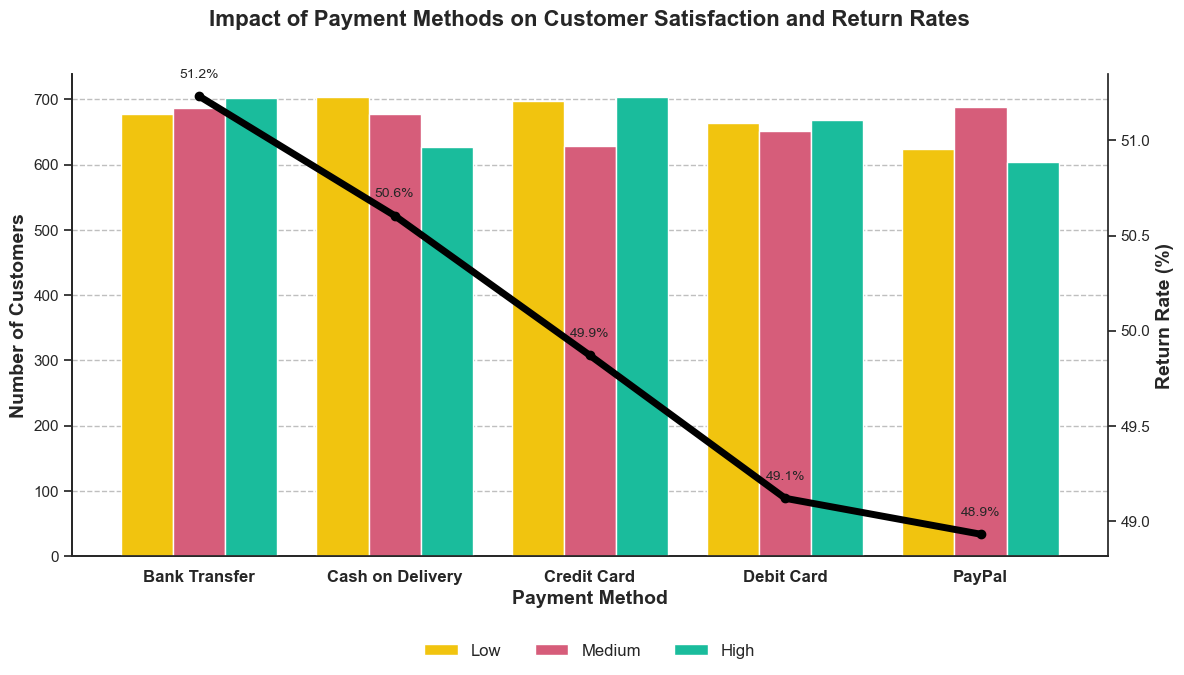

In [25]:
# payment_satisfaction = df.groupby('Payment Method')['Review Score (1-5)'].mean().sort_values(ascending=False)
# print("Average Customer Satisfaction by Payment Method:")
# print(payment_satisfaction)

# Data Presentation
# Satisfaction counts for bar chart

satisfaction_counts = (
    df.groupby(['Payment Method', 'Customer Satisfaction'])
    .size()
    .unstack(fill_value=0)
)

# Return Rate (%) for line chart

return_rate = (
    df.groupby('Payment Method')['Return Customer']
    .mean()
    .sort_values(ascending=False) * 100
)


# Chart Setup

fig, ax1 = plt.subplots(figsize=(12,7))
ax1.set_facecolor('white')

# Color codes (Low, Medium, High)
colors = ['#f1c40f', '#d65d7a', '#1abc9c']

# Bar Chart for Customer Satisfaction

satisfaction_counts[['Low', 'Medium', 'High']].plot(
    kind='bar',
    ax=ax1,
    color=colors,
    width=0.8,
    zorder=3
)

# Grid lines

ax1.grid(axis='y', linestyle='--', alpha=0.5, color='gray', zorder=0)

# Line Chart for Return Rate
ax2 = ax1.twinx()
ax2.plot(
    return_rate.index,
    return_rate.values,
    color='black',
    linewidth=5,
    marker='o',
    zorder=10,
    label='Return Rate (%)'
)

# Data Labels for Return Rate

for x, y in zip(return_rate.index, return_rate.values):
    ax2.text(x, y + 0.1, f"{y:.1f}%", ha='center', fontsize=10)


# Labels and Titles

ax1.set_title('Impact of Payment Methods on Customer Satisfaction and Return Rates', fontsize=16, fontweight='bold', pad=35)
ax1.set_xlabel('Payment Method', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Customers', fontsize=14, fontweight='bold')
ax2.set_ylabel('Return Rate (%)', fontsize=14, fontweight='bold')

# plt.suptitle(
#     "Higher Satisfaction Does Not Always Guarantee Higher Retention",
#     fontsize=11,
#     y=0.85, fontstyle='italic'
# )


# x-Axis formatting
ax1.set_xticklabels(
    satisfaction_counts.index, rotation=0, fontsize=12, fontweight='bold')

# Legends
ax1.legend(
    ['Low', 'Medium', 'High'], 
    fontsize=12, title_fontsize=13, loc='upper center',
    bbox_to_anchor=(0.5, -0.15), ncol=3, frameon=False
    )

# Clean up the plot

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()



### Q3: How does the location influence both purchase amount and delivery time?

C:\Users\Rumman\AppData\Local\Temp\ipykernel_14052\1378977935.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=loc_insights.index, y=loc_insights['Purchase Amount ($)'],
C:\Users\Rumman\AppData\Local\Temp\ipykernel_14052\1378977935.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(loc_insights.index, rotation=0, fontsize=11, fontweight='bold')


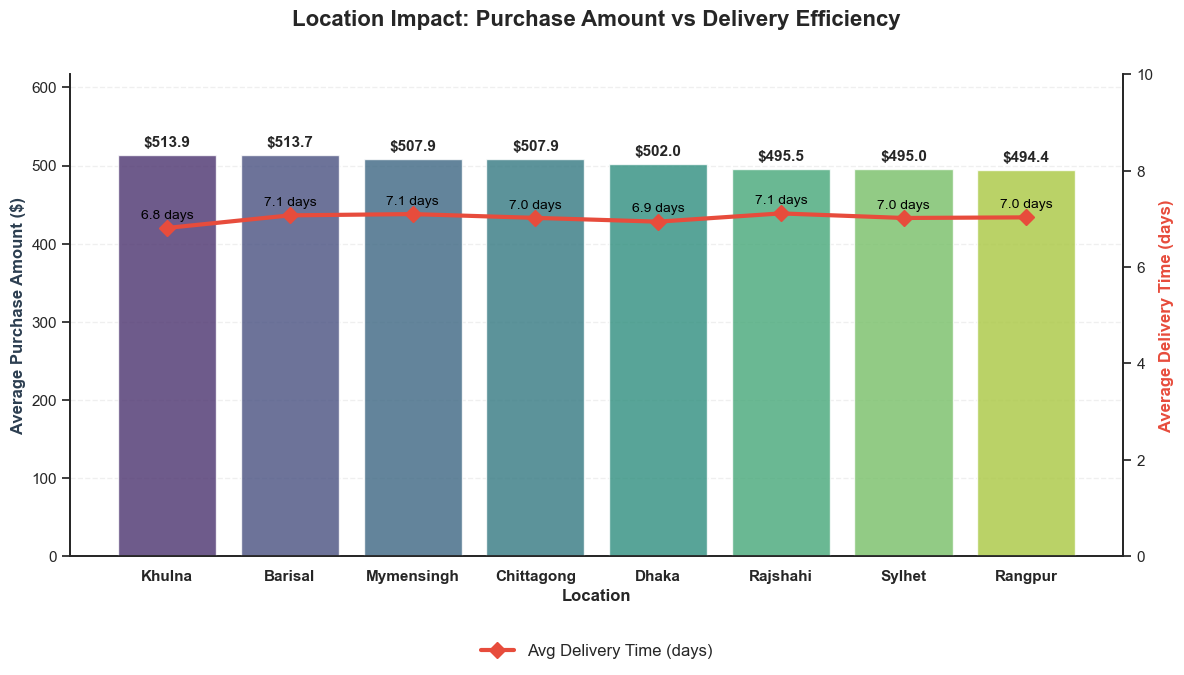

In [26]:
# Data Preparation
loc_insights = df.groupby('Location').agg({
    'Purchase Amount ($)': 'mean',
    'Delivery Time (days)': 'mean',
}).sort_values(by='Purchase Amount ($)', ascending=False)

# Charts Setups
fig, ax1 = plt.subplots(figsize=(12,7))
ax1.set_facecolor('white')

# Bar Chart for Average Purchase Amount
sns.set_style('white')
bars = sns.barplot(x=loc_insights.index, y=loc_insights['Purchase Amount ($)'],
                   palette='viridis', ax=ax1, alpha=0.8, zorder=3)

# Data Labels for Bar Chart
for i in bars.patches:
    ax1.annotate(f'${i.get_height():.1f}', (i.get_x() + i.get_width() / 2, i.get_height()),
                 ha='center', va='center', xytext=(0,9), textcoords='offset points', 
                 fontsize=11, fontweight='bold')
    
# Secondary Axis for Average Delivery Time
ax2 = ax1.twinx()
ax2.plot(loc_insights.index, loc_insights['Delivery Time (days)'],
         color='#e74c3c', linewidth=3, marker='D', markersize=8, zorder=10, label='Avg Delivery Time (days)')

# Data Labels for Line Chart
for x, y in zip(loc_insights.index, loc_insights['Delivery Time (days)']):
    ax2.text(x, y + 0.2, f"{y:.1f} days", ha='center', fontsize=10, color='black')

# Title and Labels
ax1.set_title('Location Impact: Purchase Amount vs Delivery Efficiency', fontsize=16, fontweight='bold', pad=35)
ax1.set_xlabel('Location', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Purchase Amount ($)', fontsize=12, fontweight='bold', color='#2c3e50')
ax2.set_ylabel('Average Delivery Time (days)', fontsize=12, fontweight='bold', color='#e74c3c')

# Formating
ax1.set_xticklabels(loc_insights.index, rotation=0, fontsize=11, fontweight='bold')
ax1.grid(axis='y', linestyle='--', alpha=0.3)
ax1.set_ylim(0, loc_insights['Purchase Amount ($)'].max() * 1.2)
ax2.set_ylim(0,10) # fixed scale for delivery time max 10 days

# Legends
ax2.legend(fontsize=12, title_fontsize=13, loc='upper center',
           bbox_to_anchor=(0.5, -0.15), frameon=False)

# Clean up the plot
sns.despine(right=False)
plt.tight_layout()
plt.show()

### Q4: What major insights are found? Give a proper explanation.

This project involved a multi-level analysis of E-commerce customer behavior. By integrating findings from basic demographics (Level 1), transactional patterns (Level 2), and retention drivers (Level 3), we have identified the following major insights:

**1️⃣ The Role of Customer Satisfaction (Overall Impact)**

Throughout the analysis, Customer Satisfaction emerged as a consistent baseline.

**Insight:** Satisfied customers (Review Score 4-5) show a significantly higher probability of becoming "Return Customers." Satisfaction is the foundation upon which all other loyalty factors are built.

**2️⃣ Transactional Efficiency & Payment Preferences**

Our Level 2 analysis showed that while payment methods are diverse, certain methods like Credit Cards and Digital Wallets are associated with higher transaction values and better retention.

**Insight:** Providing a seamless and trusted payment ecosystem is crucial for converting one-time shoppers into repeat buyers.

**3️⃣ Logistics & Geographical Opportunities**

The geographical analysis highlighted that high-value orders often come from specific locations, but these locations sometimes face delivery delays.

**Insight:** Reducing delivery time in high-value clusters is the most direct way to improve local market share and customer happiness.

**4️⃣ Loyalty Drivers: Subscription & Incentives (Critical Thinking)**

The deep dive in Level 3 revealed that Subscription Status (Premium/Trial) is the single strongest predictor of customer return.

**Insight:** A customer is far more likely to return if they are part of a membership program or have access to targeted discounts. Discounts are not just for acquisition; they are powerful tools for retention.

**🔑 Final Conclusion & Strategic Recommendations**

To drive business growth, the following strategies are recommended based on the data:

1. **Optimize the Subscription Funnel:** Focus on converting "Trial" and "Free" users to "Premium" status, as this group drives the most value.

2. **Personalized Discounting:** Implement data-driven discount offers specifically for customers who haven't purchased in 30+ days.

3. **Logistics Reinforcement:** Target high-spending locations for "Express Delivery" programs to maintain a competitive edge.